In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


In [ ]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
print("Flattened training data shape:", X_train_flat.shape)


Flattened training data shape: (60000, 784)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)


In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

print("\nExplained Variance Ratio (2 components):", pca.explained_variance_ratio_)
print("Total Variance Retained:", np.sum(pca.explained_variance_ratio_) * 100, "%")


Explained Variance Ratio (2 components): [0.05646717 0.04078272]
Total Variance Retained: 9.724988908210875 %


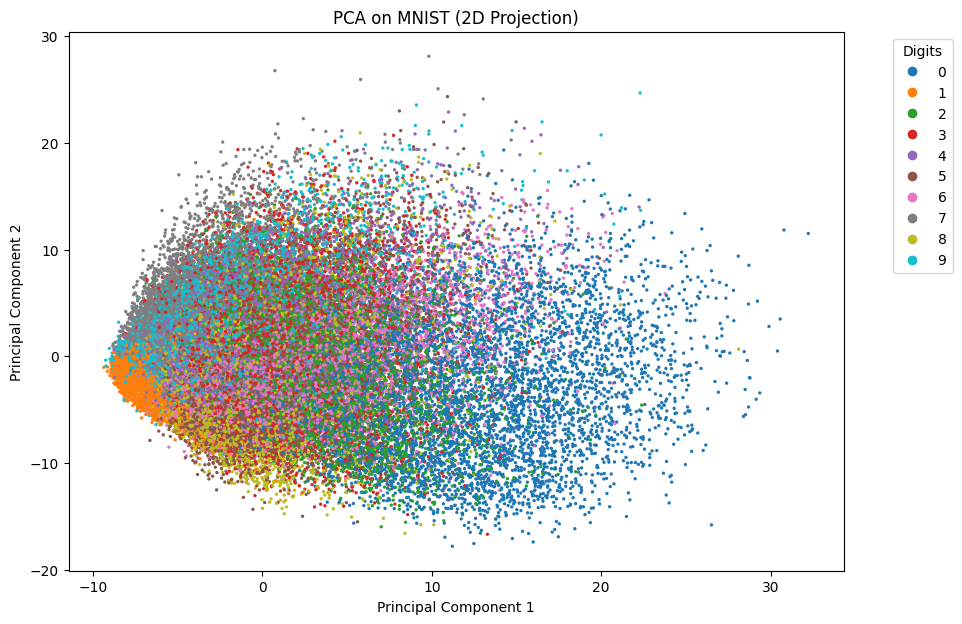

In [ ]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='tab10', s=2)
plt.legend(*scatter.legend_elements(), title="Digits", loc="upper right", bbox_to_anchor=(1.15, 1))
plt.title("PCA on MNIST (2D Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [ ]:
pca_recon = PCA(n_components=100)
X_train_pca_100 = pca_recon.fit_transform(X_train_scaled)
X_train_reconstructed = pca_recon.inverse_transform(X_train_pca_100)


In [ ]:
mse = mean_squared_error(X_train_scaled, X_train_reconstructed)
print("\nReconstruction Mean Squared Error (100 components):", mse)



Reconstruction Mean Squared Error (100 components): 0.2689248345811992


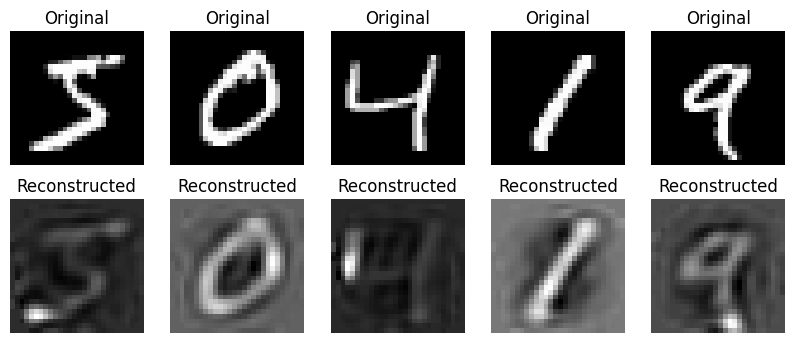

In [ ]:
n = 5
plt.figure(figsize=(10, 4))
for i in range(n):
    # Original
    plt.subplot(2, n, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed
    plt.subplot(2, n, n+i+1)
    recon_img = X_train_reconstructed[i].reshape(28, 28)
    plt.imshow(recon_img, cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()